In [4]:
CONFIG_FILE_NAME = 'sbwatcher.json'
CONFIG_FOLDER_NAME = 'configs'

import os
import json
import datetime

from mysql import connector as connector

import matplotlib.pyplot as plt
#import pandas as pd

dirName, _ = os.path.split(os.path.abspath(''))
config_file_path = dirName + os.path.sep + os.path.sep + CONFIG_FOLDER_NAME + os.path.sep + CONFIG_FILE_NAME

config_file = open(config_file_path, 'r+')
configs = json.load(config_file)
config_file.close()

connect = connector.connect(**configs['mysql'])

In [5]:
query = """
SELECT buy_price, sell_price, event_ts FROM f_rates WHERE fin_id = 1 ORDER BY event_ts LIMIT 1000;
"""
cursor = connect.cursor(dictionary=True)
cursor.execute(query) 
rates = cursor.fetchall()

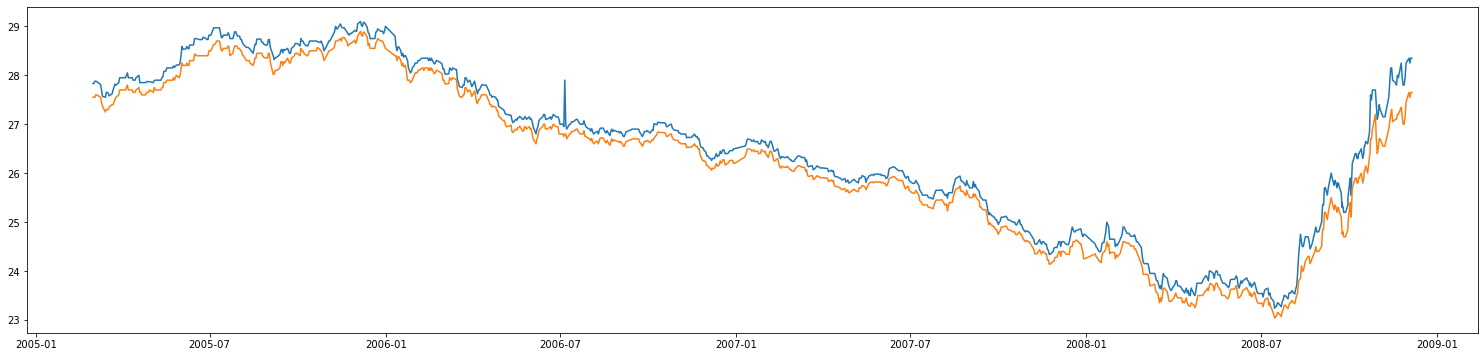

In [6]:
r_range = [datetime.datetime.fromtimestamp(item['event_ts']) for item in rates]


plt.figure(figsize=(26, 6))
#plt.xticks(rotation = 90)
plt.plot(
    r_range, 
    [item['sell_price'] for item in rates],
    )
plt.plot(
    r_range, 
    [item['buy_price'] for item in rates]
    )
